In [42]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Define parameters
Fo = 0.5
nx = 500
nt = 10000
m_per_km = 1000
L = 100*m_per_km
mm_per_m = 1000
kappa = 1./mm_per_m/mm_per_m # thermal diffusivity 1 mm^2/s converted to m^2/s
T_hot = 1600
T_ocean = 0.

# Define domain and create Temperature array, and set timesteps
dx = nx/L
dt = Fo*dx**2 / kappa
x = np.arange(nx)*dx*m_per_km
secs_per_year = 60*60*24*365
t = np.arange(nt)*dt*secs_per_year
T = np.zeros([nt, nx])

# Set initial condition
T[0,:] = T_hot
# Set boundary conditions
T[:,0] = T_ocean
T[:,-1] = T_hot

# Solve for temperature in loop
for n in np.arange(nt-1):
    T[n+1,1:-1] = Fo*T[n,2:] + (1 - 2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]

# Calculate analytical solution
def T_ana(n):
    j = np.arange(nx)
    return T_ocean + (T_hot - T_ocean)*erf(0.5*np.sqrt(j**2/(Fo*n)))

In [5]:
import matplotlib.pyplot as plt

def plot_T_profile(n):
    plt.plot(x, T[n,:])
    plt.plot(x, T_ana(n), '--')
    plt.xlabel('Depth (km)')
    plt.ylabel('Temperature (C)')

In [6]:
plot_T_profile(25)
plot_T_profile(50)
plot_T_profile(75)
plot_T_profile(95)


NameError: name 'x' is not defined

In [12]:
isotherm_idx = len(T[50,T[50]<1200]) - 1
x[isotherm_idx]

In [45]:
crust_thickness = np.zeros(nt)
for n in np.arange(nt):
    isotherm_idx = len(T[n,T[n]<1200]) - 1
    crust_thickness[n] = x[isotherm_idx]

Text(0, 0.5, 'Crust thickness (km)')

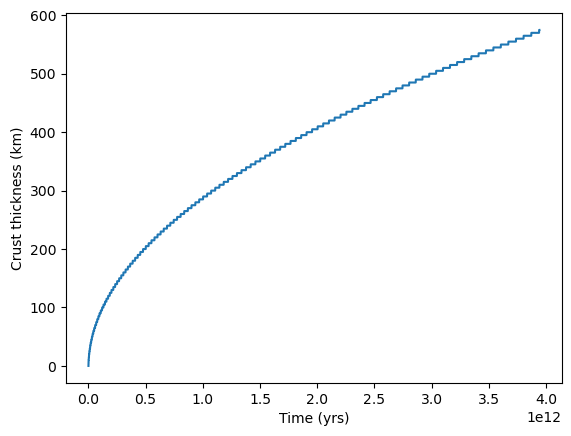

In [46]:
plt.plot(t, crust_thickness)
plt.xlabel('Time (yrs)')
plt.ylabel('Crust thickness (km)')

In [1]:
from heat_equation import solve_T

sol = solve_T()
T = sol['T']
T_ana = sol['T_ana']
x = sol['x']
t = sol['t']

In [2]:
T[50,:]

array([   0.        ,  179.64027625,  352.37131112,  525.10234598,
        678.64104363,  832.17974128,  958.30081436, 1084.42188743,
       1180.09994286, 1275.7779983 , 1342.7526371 , 1409.7272759 ,
       1452.93672029, 1496.14616468, 1521.80177229, 1547.4573799 ,
       1561.45134768, 1575.44531547, 1582.44229936, 1589.43928325,
       1592.63790446, 1595.83652567, 1597.16928451, 1598.50204334,
       1599.00633047, 1599.5106176 , 1599.68313688, 1599.85565616,
       1599.90873901, 1599.96182187, 1599.97641965, 1599.99101744,
       1599.99457788, 1599.99813831, 1599.99890126, 1599.99966421,
       1599.99980616, 1599.9999481 , 1599.99997068, 1599.99999326,
       1599.99999628, 1599.99999929, 1599.99999961, 1599.99999994,
       1599.99999997, 1600.        , 1600.        , 1600.        ,
       1600.        , 1600.        , 1600.        , 1600.        ,
       1600.        , 1600.        , 1600.        , 1600.        ,
       1600.        , 1600.        , 1600.        , 1600.     